In [6]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

keynote_folder_path='/Users/nicolas/Library/Mobile Documents/com~apple~Keynote/Documents/YIF_annual_meeting/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decay rate calibration


In [7]:
path_mac = '../../data_mac/data_bw64_11_july_2024/'
paramchar= "nl2_n1_1_E0.10E-01_dtadd0.20_0.30_3_ar0.0_g0.000_al0.008013_nm2000_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_33.000_12.600_bw64.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv1.0_tmax25_TRSM3"
dyn_cav1_2000 = da.dynamics(2, path_mac, paramchar)
#paramchar= "nl2_n1_1_E0.10E+00_dtadd0.20_0.20_4_ar0.0_g0.000_al0.007982_nm1000_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_17.000_12.600_bw32.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv1.0_tmax50_TRSM3"
#dyn_cav1_1000_LONG = da.dynamics(2, path_mac, paramchar)
#paramchar= "nl2_n1_1_E0.10E+00_dtadd0.20_0.20_4_ar0.0_g0.000_al0.007982_nm2000_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_17.000_12.600_bw32.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv1.0_tmax25_TRSM3"
#dyn_cav1_2000 = da.dynamics(2, path_mac, paramchar)

paramchar= "nl2_n1_1_E0.10E-01_dtadd0.20_0.30_3_ar0.0_g0.000_al0.008013_nm2000_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_33.000_12.600_bw64.000F_mr0.00_0.00_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv1.0_tmax25_TRSM3"
dyn_g_zero = da.dynamics(2, path_mac, paramchar)

#path_me = '../../data_me/data_5_jupy_2024/'
#paramchar_me= "tmax30_Nq2_Nc10_amp0.0500_kappa0.1000_wq5.3037_anh15.7563_wc7.4780_g0.0000_wd7.4780_ms1e-02_dimexp20_qb[1,'B']_11_TRSM3.txt"
#times_me = np.loadtxt(path_me+"TIMES_"+paramchar_me)
#photons_me = np.loadtxt(path_me+"PHOTONS_"+paramchar_me)
#a_p_adag_me = np.loadtxt(path_me+"A_P_ADAG_"+paramchar_me)
#pplt_me = np.loadtxt(path_me+"PPLT_"+paramchar_me)

-- fitted decay rate/(2*np.pi) = 0.10040287386659992 GHz


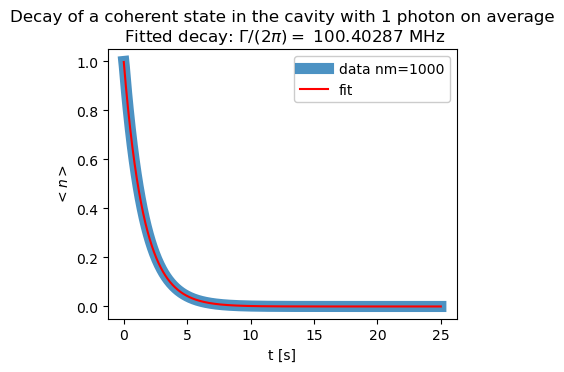

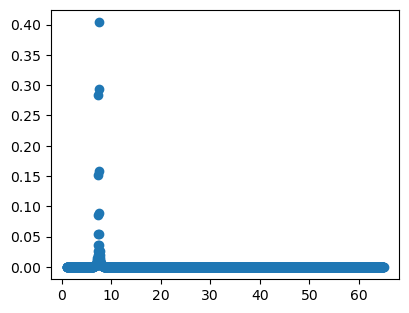

In [9]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cav1_2000.times, dyn_cav1_2000.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cav1_2000.times[1:], dyn_cav1_2000.nk[1:,0], linewidth=8, alpha=0.8,label='data nm=1000'  )
#plt.plot( dyn_cav1_1000_LONG.times[1:], dyn_cav1_1000_LONG.nk[1:,0], linewidth=8, alpha=0.8,label='data nm=1000 LONG'  )
plt.plot( dyn_cav1_2000.times[1:], exp_decay( dyn_cav1_2000.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()
plt.show()

plt.scatter( dyn_cav1_2000.wk[:]/(2*np.pi), dyn_cav1_2000.nk[-1,1:]*2, label='nm=2000'  )
#plt.scatter( dyn_cav1_1000.wk[:]/(2*np.pi), dyn_cav1_1000.nk[-1,1:], label='nm=1000'  )
#plt.axvline( 7.478 ,c='gray', dashes=[2,2,2,2] )
#plt.xlabel( "Freqs $\omega/(2\pi)$"  )
#plt.ylabel( "$<n_k>$" )
#plt.xlim(7.4,7.6)
#plt.legend()
#plt.tight_layout()

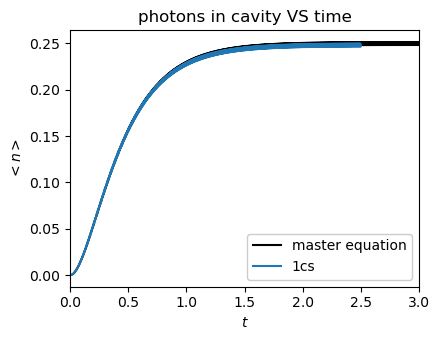

In [26]:
plt.plot( (Gamma/(2*np.pi))*times_me, photons_me, label='master equation',c='black'  )  
plt.plot( (Gamma/(2*np.pi))*dyn_g_zero.times, dyn_g_zero.nk[:,0], label='1cs'  )  
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,3)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

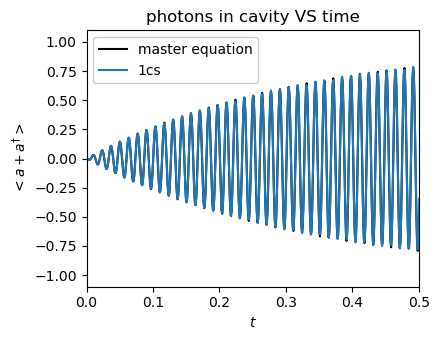

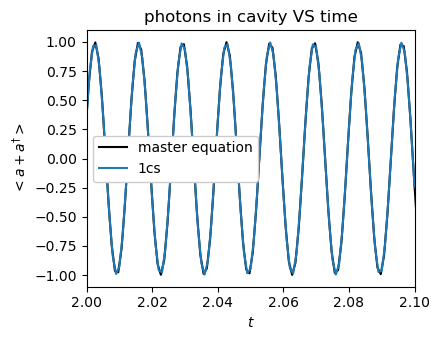

In [30]:
plt.plot( (Gamma/(2*np.pi))*times_me, a_p_adag_me, label='master equation',c='black'  )  
plt.plot( (Gamma/(2*np.pi))*dyn_g_zero.times, dyn_g_zero.apadag, label='1cs'  )  
plt.ylabel( "$<a+a^\dag>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,0.5)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

plt.plot( (Gamma/(2*np.pi))*times_me, a_p_adag_me, label='master equation',c='black'  )  
plt.plot( (Gamma/(2*np.pi))*dyn_g_zero.times, dyn_g_zero.apadag, label='1cs'  )  
plt.ylabel( "$<a+a^\dag>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(2,2.1)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()